## Graham Brew, May 31st, 2021
## Experiments in Sentinal-2 Machine Learning Image Classification using ML (K-Means?)

### Local Download and Processing:

* Download Sentinel-2 data from here: https://earthexplorer.usgs.gov/ or https://scihub.copernicus.eu/dhus/#/home

* Merge all the 13? bands into a GeoTiff: https://gis.stackexchange.com/questions/257836/raw-sentinel-2-jp2-to-rgb-geotiff

* Classification: https://towardsdatascience.com/sentinel-2-image-clustering-in-python-58f7f2c8a7f6 and https://github.com/wathela/Sentinel2-clustering or http://www.acgeospatial.co.uk/k-means-sentinel-2-python/

* What about reflectance?: http://atedstone.github.io/sentinel2-l2a-geotiff/ ideally we would use the L2A data. But L1C data is more widely available.

* Based on least Cloud cover, picked on this image via USGS: Entity ID	L1C_T12SUH_A030683_20210507T182040
Should add an API call here to download that.

### Cloud Based Processing ideas:

* Sentintel-2 L2A data are here: https://registry.opendata.aws/sentinel-2/

* Processing in the Cloud ideas here: https://towardsdatascience.com/access-satellite-imagery-with-aws-and-google-colab-4660178444f5

* Frontend on Streamlit? https://medium.com/@varsha-gopalakrishnan/deploying-your-geospatial-machine-learning-projects-as-web-apps-using-streamlit-and-heroku-45d64f6d5cb0

* This article very breifly describes GoogleEarth download using a Python API and package: https://towardsdatascience.com/how-to-download-high-resolution-satellite-data-for-anywhere-on-earth-5e6dddee2803

### .
### .
### Cloud Based Processing ideas: 
* Write a new second here and run this part alone

In [ ]:
# Cloud based processing ideas

# First, access the Sentintal-2 image on AWS:


### Local Download and Processing:
* Only input is Sentintel-2 ZIP file from USGS Earth Explorer 
* Still need to automate the unzip and some other parts (May 30th, 2021)
* Need to reset the hardcoded absolute paths

In [3]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import numpy as np
import os, subprocess

In [4]:
def sentinel_import(subdatasets, names):
    '''
    Use GDAL to import the SENTINEL data as a set of multiband GeoTIFFS
    '''
    for subdataset,name in zip(subdatasets,names):
        outname1 = name + '.vrt'
        outname2 = name + '.tif'
        print('\nCreating', outname2)
        subprocess.run([r'C:\ProgramData\Anaconda3\Library\bin\gdalbuildvrt', outname1, subdataset])
        subprocess.run([r'C:\ProgramData\Anaconda3\Library\bin\gdal_translate', outname1, outname2])

In [5]:

def process_bands(image_directory, short_name_root):
    '''
    cd to directory and make all the products
    '''
    os.chdir(r'D:/users/graham/OneDrive - Dynamic Graphics, Inc/Python/33_IMAGE_CLASSIFICATION/geothermal')
    os.chdir(image_directory)
    # First, to get the Sentinel Image info
    result = subprocess.run(['gdalinfo', 'MTD_MSIL1C.xml'])

    # The following are the four sets of "equal" resolution bands (10,, 20, 60 meters and TCI)
    subdatasets = ['SENTINEL2_L1C:MTD_MSIL1C.xml:10m:EPSG_32612', 'SENTINEL2_L1C:MTD_MSIL1C.xml:20m:EPSG_32612', \
               'SENTINEL2_L1C:MTD_MSIL1C.xml:60m:EPSG_32612', 'SENTINEL2_L1C:MTD_MSIL1C.xml:TCI:EPSG_32612']
    # Let's give them some friendly names
    names = [short_name_root+'_2_3_4_8_res10m', short_name_root+'_5_6_7_8A_11_12_res20m', short_name_root+'_1_9_10_res60m', short_name_root+'_true_color']
    # Call the function to import thr four like-reolsution images
    sentinel_import(subdatasets, names)


    # Alternative approach to get all the bands into a single GeoTIFF
    _ = '.\GRANULE\\' + image_directory + '\IMG_DATA'
    os.chdir(_)

    import glob
    jp2_files = glob.glob('*.jp2')
    #jp2_file_csv = "','".join(jp2_files)
    start_of_list = ['C:\ProgramData\Anaconda3\Library\\bin\gdalbuildvrt', '-separate', '-resolution', 'highest', '-r', 'cubic', 'stack.vrt']
    to_run = start_of_list + jp2_files
    print(to_run)
    subprocess.run(to_run)

    subprocess.run([r'C:\ProgramData\Anaconda3\Library\bin\gdal_translate', 'stack.vrt', 'allbands.tif'])
    !mv allbands.tif ../../../allbands.tif
    os.chdir(r'D:/users/graham/OneDrive - Dynamic Graphics, Inc/Python/33_IMAGE_CLASSIFICATION/geothermal')
    os.chdir(image_directory)
    geotherm_raster = rio.open('allbands.tif')
    print('\n', geotherm_raster.meta)

In [6]:
#process_bands('L1C_T12SUH_A030683_20210507T182040', '20210507')
process_bands('L1C_T12SUH_A018271_20200904T182231', '20200904')


Creating 20200904_2_3_4_8_res10m.tif

Creating 20200904_5_6_7_8A_11_12_res20m.tif

Creating 20200904_1_9_10_res60m.tif

Creating 20200904_true_color.tif
['C:\\ProgramData\\Anaconda3\\Library\\bin\\gdalbuildvrt', '-separate', '-resolution', 'highest', '-r', 'cubic', 'stack.vrt', 'T12SUH_20200904T180919_B01.jp2', 'T12SUH_20200904T180919_B02.jp2', 'T12SUH_20200904T180919_B03.jp2', 'T12SUH_20200904T180919_B04.jp2', 'T12SUH_20200904T180919_B05.jp2', 'T12SUH_20200904T180919_B06.jp2', 'T12SUH_20200904T180919_B07.jp2', 'T12SUH_20200904T180919_B08.jp2', 'T12SUH_20200904T180919_B09.jp2', 'T12SUH_20200904T180919_B10.jp2', 'T12SUH_20200904T180919_B11.jp2', 'T12SUH_20200904T180919_B12.jp2', 'T12SUH_20200904T180919_B8A.jp2', 'T12SUH_20200904T180919_TCI.jp2']

 {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 14, 'crs': None, 'transform': Affine(10.0, 0.0, 300000.0,
       0.0, -10.0, 4300020.0)}


In [44]:
# Open the image
os.chdir(r'D:/users/graham/OneDrive - Dynamic Graphics, Inc/Python/33_IMAGE_CLASSIFICATION/geothermal')
for _ in range(4):
    image = names[_] + '.tif' 
    geotherm_raster = rio.open(image)
    print('\n', geotherm_raster.meta)


 {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 4, 'crs': CRS.from_epsg(32612), 'transform': Affine(10.0, 0.0, 300000.0,
       0.0, -10.0, 4300020.0)}

 {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 5490, 'height': 5490, 'count': 6, 'crs': CRS.from_epsg(32612), 'transform': Affine(20.0, 0.0, 300000.0,
       0.0, -20.0, 4300020.0)}

 {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1830, 'height': 1830, 'count': 3, 'crs': CRS.from_epsg(32612), 'transform': Affine(60.0, 0.0, 300000.0,
       0.0, -60.0, 4300020.0)}

 {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 3, 'crs': CRS.from_epsg(32612), 'transform': Affine(10.0, 0.0, 300000.0,
       0.0, -10.0, 4300020.0)}


In [7]:
# Read, enhance and show the image
geotherm_raster = rio.open('allbands.tif')
geotherm_arr = geotherm_raster.read(1)
vmin, vmax = np.nanpercentile(geotherm_arr, (5,95))  # 5-95% contrast stretch

fig, ax = plt.subplots(figsize=[10,10], ncols=1,nrows=1)
show(geotherm_raster, cmap='gray', vmin=vmin, vmax=vmax, ax=ax)
ax.set_axis_off()
fig.savefig("geotherm.jpg", bbox_inches='tight')
plt.show()

IndexError: band index 0 out of range (not in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [8]:
# print the shape of the original image
geotherm_arr.shape

(10980, 10980)

In [9]:
# create an empty array with same dimension and data type
imgxyb = np.empty((geotherm_raster.height, geotherm_raster.width, geotherm_raster.count), geotherm_raster.meta['dtype'])
imgxyb.shape

(10980, 10980, 14)

In [10]:
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = geotherm_raster.read(band+1)
# convert to 1d array
img1d = imgxyb[:,:,:14].reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))
img1d.shape

(120560400, 14)

In [11]:
# create an object of the classifier and train it
n_clusters=6
cl = cluster.KMeans(n_clusters)
param = cl.fit(img1d)

In [12]:
cl.labels_

array([3, 3, 3, ..., 0, 0, 0])

In [13]:
# get the labels of the classes and reshape it x-y-bands shape order (one band only)
img_cl = cl.labels_
img_cl = img_cl.reshape(imgxyb[:,:,0].shape)
img_cl.shape

(10980, 10980)

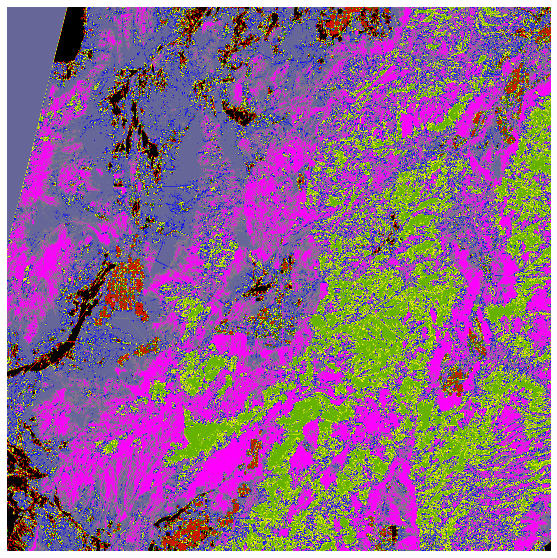

In [14]:
# Create a custom color map to represent our different 4 classes
cmap = mc.LinearSegmentedColormap.from_list("", ["black","red","green","yellow", "blue", "grey", "magenta"])

# Show the resulting array and save it as jpg image
plt.figure(figsize=[10,10])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
outname="geothermal_clustered_" + n_clusters + "_classes.jpg"
plt.savefig(outname, bbox_inches='tight')
plt.show()